# Final Project Submission
* Student name: Miguel Santana
* Student pace: Full Time
* Scheduled project review date/time: 10/14/2020, 12-12:45pm
* Instructor name: James Irving
* Blog post URL: [Medium Post](https://medium.com/@msantana269/m3-blog-post-3760e392a0f4)

# Project Methodology & Goal
**A Portuguese financial institution provided data resulting from various direct telemarketing campaigns with the goal of predicting subscriber term deposits. The following will include an in depth analysis of the client, campaign, social, economic and additional features that lend to predicting whether a client will subscribe a term deposit. The analysis will culminate in actionable business recommendations that will drive the target variable.**  

# Data Analysis and Modeling
OSEMN Framework
* Obtain
* Scrub
* Explore
* Model
* INterpret

# OBTAIN

<div class="alert alert-block alert-info">

Dataset Citation:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Available via:
* [UCI's Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

* [Kaggle](https://www.kaggle.com/henriqueyamahata/bank-marketing) 

</div>

## Python Project Libraries
Importing Packages & Processing our Dataset

In [1]:
# Math, Visualizations, Cleaning and Analysis
import pandas as pd # data cleaning and manipulation
import numpy as np # numerical operations  
import seaborn as sns # visualizations / plt.style.use('seaborn-poster') 
#sns.set(style='whitegrid')
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# pd.set_option('display.max_columns',0)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings("ignore")

# Machine Learning / Reporting
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

/Users/miguelsantana/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

## Variable Key
The dataset includes the following client, campaign, social, economic and other attributes:

**Client Data**
* Age
* Job Type
* Marital Status
* Education 
* Default **(client credit in default)**
* Housing **(client housing loan)**
* Loan **(client personal loan)**

**Current Campaign | Last Contact** 
* Contact Type
* Month 
* Day of Week 
* Duration (in seconds)

**Other Attributes:**
* Campaign (number of contacts/this campaign)
* Pdays (days since last contacted/previous campaign)
* Previous (contacts performed before this campaign/this client)
* Poutcome (previous campaign outcome)

**Social & Economic Context Attributes**
* Emp.var.rate (quarterly employment variation rate)
* Cons.price.idx (monthly indicator - consumer price index)
* Cons.conf.idx (monthly indicator - consumer confidence index)
* Euribor3m (daily indicator - euribor 3 month rate)
* Nr.employed (quarterly indicator - number of employees)

**Output/Target**
* y (has the client subscribed a term deposit?)

In [3]:
df = df.rename(columns={'y':'term_deposit'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# SCRUB

In [5]:
for col in df.columns: # preliminary view of value counts per column
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

age 31    1947
32    1846
33    1833
36    1780
35    1759
Name: age, dtype: int64


job admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
Name: job, dtype: int64


marital married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


education university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
Name: education, dtype: int64


default no         32588
unknown     8597
yes            3
Name: default, dtype: int64


housing yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


loan no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


contact cellular     26144
telephone    15044
Name: contact, dtype: int64


month may    13769
jul     7174
aug     6178
jun     5318
nov     4101
Name: month, dtype: int64


day_of_week thu    8623
mon    8514
wed    8134

## Null & Unknown Values

In [6]:
print('Missing values : ', df.isnull().sum().values.sum()) # null values
print('\n')
print('Unique values: \n', df.nunique()) # unique values per column
# df.isnull().values.any() 

Missing values :  0


Unique values: 
 age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
term_deposit         2
dtype: int64


<div class="alert alert-success">

There are no missing values in the dataset. There are a substantial amount of "unknown" values which will need to be addressed.  

</div> 

## Addressing Unknown Variables

In [7]:
print('Unknown Values Per Column')
for col in df.columns: # preliminary view of value counts per column
    try:
        print(col, df[col].value_counts()['unknown'])
    except:
        pass

Unknown Values Per Column
job 330
marital 80
education 1731
default 8597
housing 990
loan 990


<div class="alert alert-success">

In order to narrow down my dataset I will drop the "unknown" values from each column except for 'default'. After processing both updates ('unknown' & outlier removal) I should maintain over 90% of my original dataset.

</div> 

In [8]:
orig_len = len(df)
orig_len

41188

In [9]:
# Dropping unknown variables from various columns
def drop_unknown(df, col_name):
    '''Dropping rows that contain unknown as a cell'''
    start_len = len(df)
    new_df = df.loc[(df[col_name] != 'unknown')]
    print(f'There were {start_len - len(new_df)} unknown values removed from {col_name}')
    return new_df

In [10]:
remove_job = drop_unknown(df, 'job')

There were 330 unknown values removed from job


In [11]:
remove_marital = drop_unknown(remove_job, 'marital')

There were 71 unknown values removed from marital


In [12]:
remove_education = drop_unknown(remove_marital, 'education')

There were 1596 unknown values removed from education


In [13]:
remove_housing = drop_unknown(remove_education, 'housing')

There were 946 unknown values removed from housing


In [14]:
remove_loan = drop_unknown(remove_housing, 'loan')

There were 0 unknown values removed from loan


In [15]:
df = remove_loan
print(f'There were {orig_len - len(remove_loan)} unknown values removed from the dataset')

There were 2943 unknown values removed from the dataset


In [16]:
print(f'The dataframe represents {(len(df)/orig_len) * 100}% of the original data prior to outlier removal.')

The dataframe represents 92.85471496552394% of the original data prior to outlier removal.


## Outlier Removal

The outlier removal will be centered on age

In [17]:
# IQR Outlier Removal Function
def iqr_outlier_rem(df, col_name):
    '''Removing outliers using the IQR method'''
    start_len = len(df)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1 # Finding interquartile range
    lower_threshold  = Q1-1.5*IQR
    upper_threshold = Q3+1.5*IQR
    new_df = df.loc[(df[col_name] > lower_threshold) & (df[col_name] < upper_threshold)]
    print(f'There were {start_len - len(new_df)} outliers removed from {col_name}')
    return new_df

In [18]:
df = iqr_outlier_rem(df, 'age')

There were 412 outliers removed from age


In [19]:
print(df.shape)
df['age'].describe()

(37833, 21)


count    37833.000000
mean        39.458356
std          9.572227
min         17.000000
25%         32.000000
50%         38.000000
75%         46.000000
max         69.000000
Name: age, dtype: float64

In [20]:
print(f'The new dataframe represents {(len(df)/orig_len) * 100} percent of the original dataset.')

The new dataframe represents 91.85442361852967 percent of the original dataset.


<div class="alert alert-block alert-info">

The dataset now represents clients between the ages of 17 and 69 with a specific job status, marital status, education level and housing or personal loan status per bank records. 

The dataset will be separated in order to show features that are representative of "yes" in our target variable.

</div> 

In [21]:
df_fresh = df.copy() # clean copy for final model analysis
yesdf = df[df['term_deposit'] == 'yes']
nodf = df[df['term_deposit'] == 'no']

## Notable Data Columns / Feature Conversions 
<div class="alert alert-success">

* Duration - a duration of zero directly ties to the target 'no' (remove before modeling)
* Pdays - a value of 999 means the customer has not been contacted. 

</div> 

# Exploratory Data Analysis

<div class="alert alert-block alert-info">

**The dataset illustrations are representative of trends in converted customers. Analysis will show which customer segments and features are most common when considering customers who subscribed term deposits.** 

</div> 

## Consumer Features

### Age, Education Level & Job Type

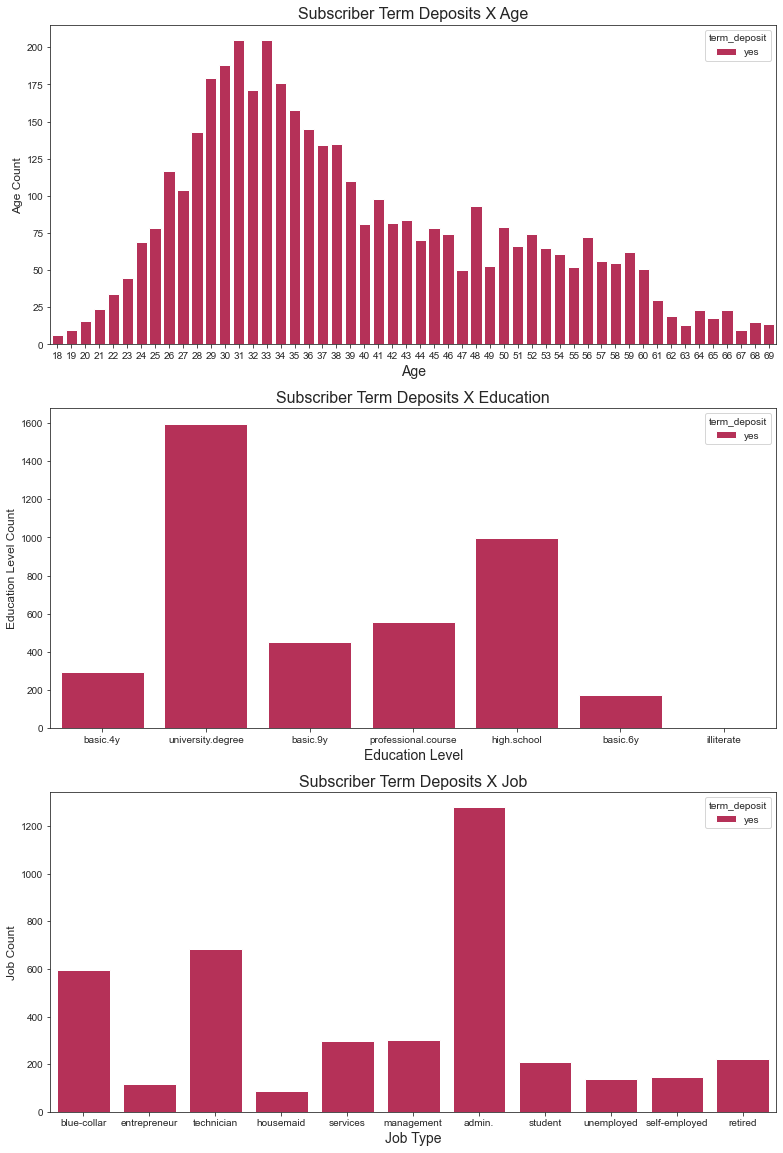

In [22]:
sns.set_style('ticks')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(13,20))

ax1 = sns.countplot(x='age', data=yesdf, hue='term_deposit', palette='rocket', ax=ax[0])
ax1.set_title('Subscriber Term Deposits X Age', fontdict={'fontsize': 16})
ax1.set_xlabel('Age', fontdict={'fontsize': 14})
ax1.set_ylabel('Age Count', fontdict={'fontsize': 12})

ax2 = sns.countplot(x='education', data=yesdf, hue='term_deposit', palette='rocket', ax=ax[1])
ax2.set_title('Subscriber Term Deposits X Education', fontdict={'fontsize': 16})
ax2.set_xlabel('Education Level', fontdict={'fontsize': 14})
ax2.set_ylabel('Education Level Count', fontdict={'fontsize': 12})

ax3 = sns.countplot(x='job', data=yesdf, hue='term_deposit', palette='rocket', ax=ax[2])
ax3.set_title('Subscriber Term Deposits X Job', fontdict={'fontsize': 16})
ax3.set_xlabel('Job Type', fontdict={'fontsize': 14})
ax3.set_ylabel('Job Count', fontdict={'fontsize': 12})

plt.subplots_adjust(wspace=0.5)
plt.show()

<div class="alert alert-block alert-info">

**The majority of subscibing consumers:** 
* have a university degree
* work administrative jobs
* are in their early thirties

</div> 

## Bank Features

### Number of Employees (Quarterly)

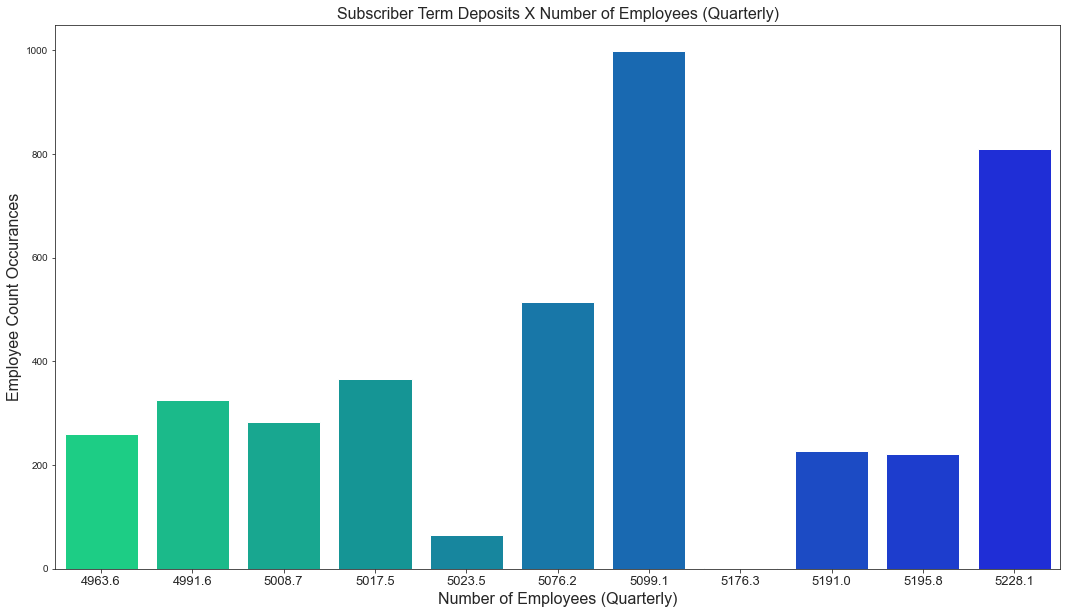

In [23]:
number_employees = yesdf['nr.employed'].value_counts()
df_number_employees = pd.DataFrame(number_employees)

x_counts = df_number_employees['nr.employed'].index
y_counts = df_number_employees['nr.employed']

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
graph_number_employees = sns.barplot(x=x_counts, y=y_counts, data=df_number_employees, palette='winter_r')
for item in graph_number_employees.get_xticklabels():
    item.set_rotation(0)
    item.set_size(13)
plt.title('Subscriber Term Deposits X Number of Employees (Quarterly)', fontdict={'fontsize': 16})
plt.ylabel('Employee Count Occurances', fontdict={'fontsize': 16})
plt.xlabel('Number of Employees (Quarterly)', fontdict={'fontsize': 16})
plt.show()

### Number of Contacts | This Campaign

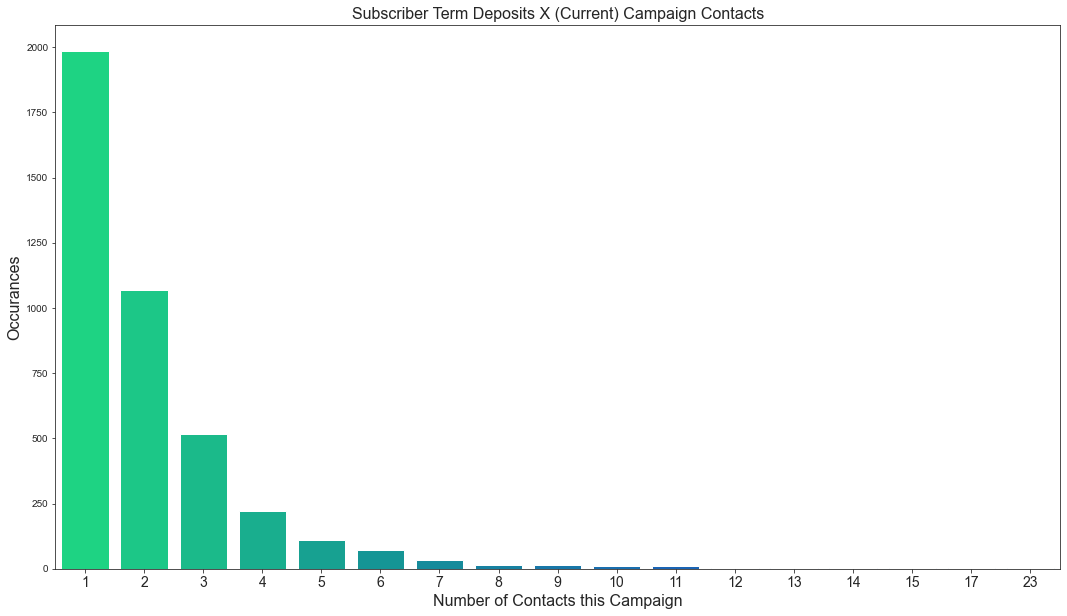

In [24]:
campaign = yesdf['campaign'].value_counts()
df_campaign = pd.DataFrame(campaign)

x_counts = df_campaign['campaign'].index
y_counts = df_campaign['campaign']

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
graph_df_campaign = sns.barplot(x=x_counts, y=y_counts, data=df_campaign, palette='winter_r')
for item in graph_df_campaign.get_xticklabels():
    item.set_rotation(0)
    item.set_size(14)
plt.title('Subscriber Term Deposits X (Current) Campaign Contacts', fontdict={'fontsize': 16})
plt.xlabel('Number of Contacts this Campaign', fontdict={'fontsize': 16})
plt.ylabel('Occurances', fontdict={'fontsize': 16})
plt.show()

### Days Since Last Contact

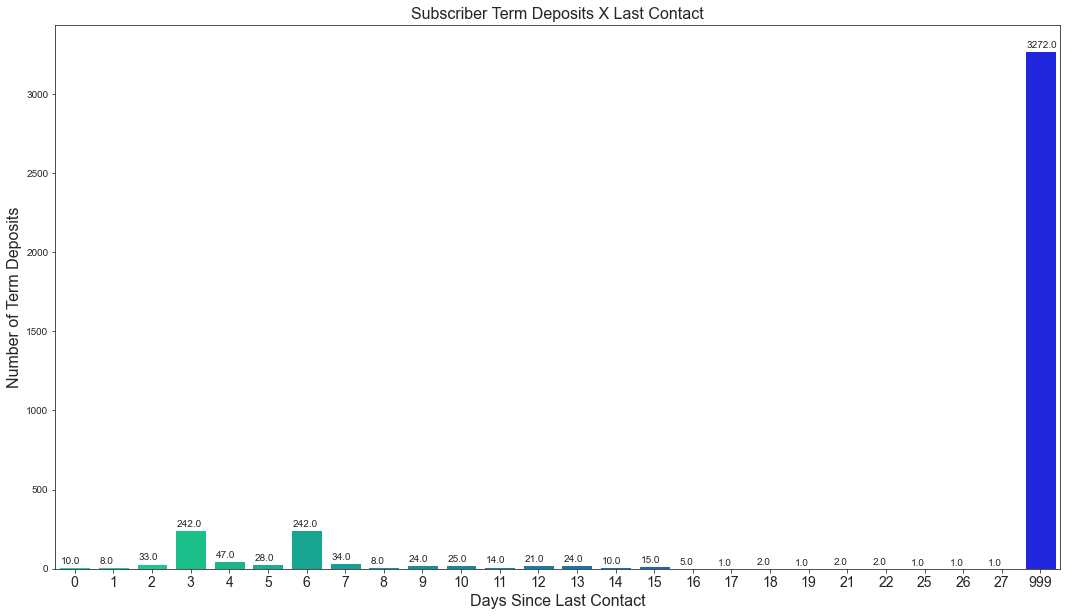

In [25]:
pdays = yesdf['pdays'].value_counts()
df_pdays = pd.DataFrame(pdays)

x_counts = df_pdays['pdays'].index
y_counts = df_pdays['pdays']

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
graph_df_pdays = sns.barplot(x=x_counts, y=y_counts, data=df_pdays, palette='winter_r')
for item in graph_df_pdays.get_xticklabels():
    item.set_rotation(0)
    item.set_size(14)
for a in graph_df_pdays.patches:
    ax.text(a.get_x()+0.05, a.get_height()+20,str(a.get_height()))
plt.title('Subscriber Term Deposits X Last Contact', fontdict={'fontsize': 16})
plt.xlabel('Days Since Last Contact', fontdict={'fontsize': 16})
plt.ylabel('Number of Term Deposits', fontdict={'fontsize': 16})
plt.show()

<div class="alert alert-block alert-info">

**Highest level of successful term deposits occur when:** 
* Bank employee levels are 5099 or 5228 (quarterly)
* During the first outreach | current campaign
* When obtained via means outside of campaigns (walk-ins / 999 = no contact)

</div> 

# Data Preparation

## Dropping Features

In [26]:
# drop duration per dataset guidelines
df = df.drop(['duration'], axis=1)

## Multicollinearity

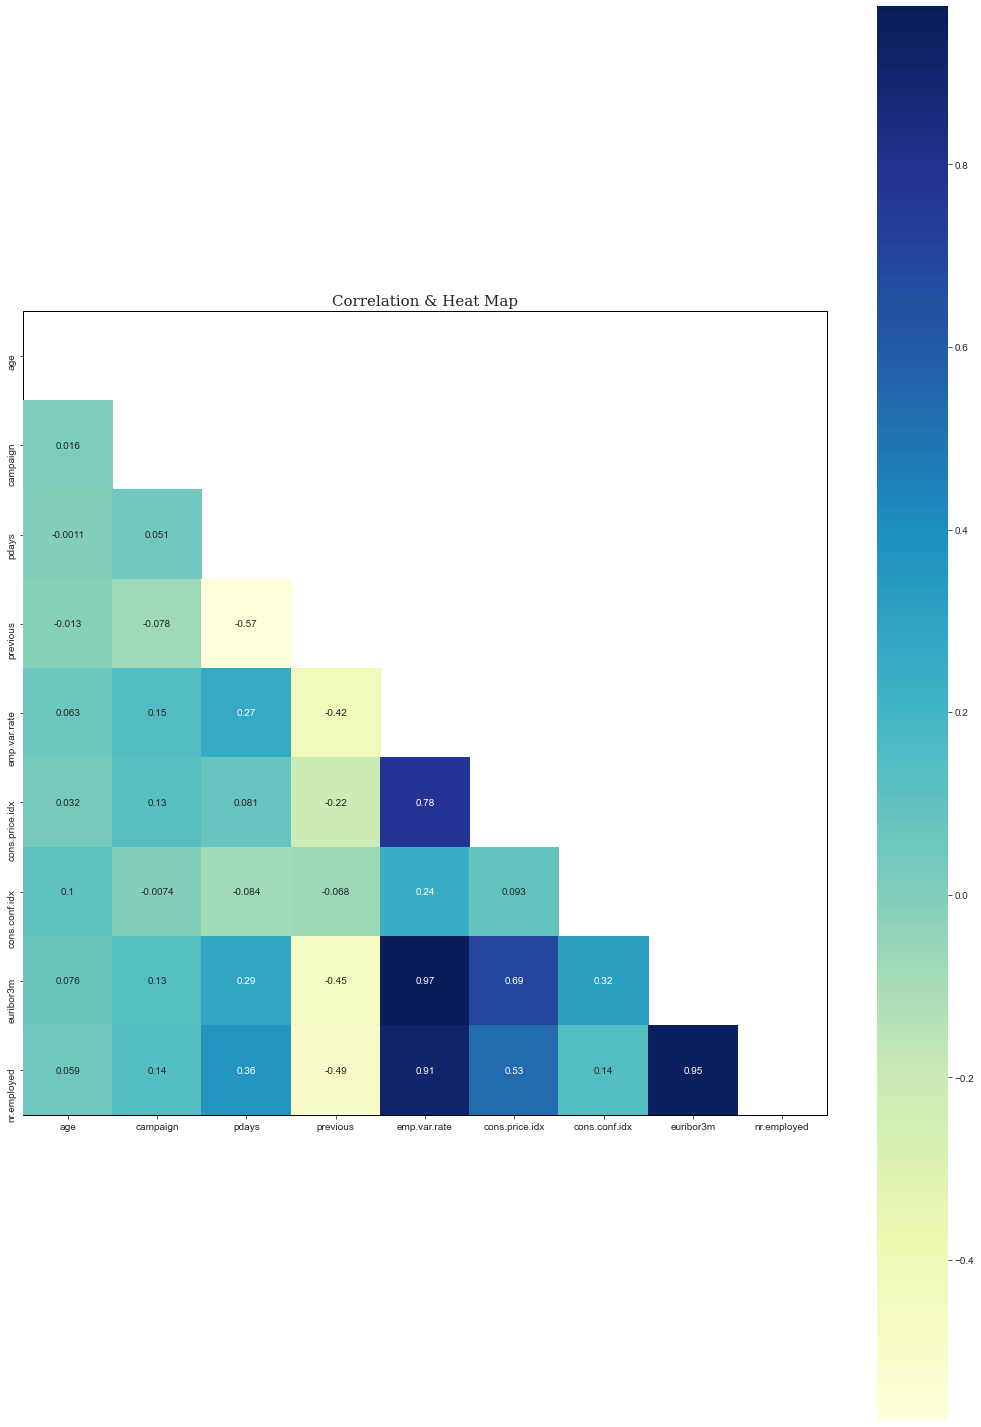

In [27]:
corr = df.corr() # analyzing correlation
# corr
fig, ax = plt.subplots(figsize=(18,26))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
#xticklabels=labels, yticklabels=labels)
#plt.xticks(rotation=-45, fontsize=16)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title("Correlation & Heat Map", fontsize=15, fontfamily="serif")
plt.show()

In [28]:
# dropping features to address multicollinearity 
df = df.drop(['emp.var.rate', 'euribor3m'], axis=1)

## Pre-Processing

### Column Names

In [29]:
# Cleaning Column Names
subs = [(' ', '_'),('.0',''),('.',''),('-','_')]

def col_formatting(col):
    '''Replacing Column Features for Model Processing'''
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

### One-Hot Encoding

In [30]:
# One Hot Encode
df = pd.get_dummies(df, drop_first=True)

In [31]:
df.select_dtypes('uint8').columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'term_deposit_yes'],
      dtype='object')

In [32]:
# Converting uint8 datatypes back to categorical variables 
for cat_cols in df.select_dtypes('uint8').columns:
         df[cat_cols] = df[cat_cols].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37833 entries, 0 to 41186
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            37833 non-null  int64   
 1   campaign                       37833 non-null  int64   
 2   pdays                          37833 non-null  int64   
 3   previous                       37833 non-null  int64   
 4   conspriceidx                   37833 non-null  float64 
 5   consconfidx                    37833 non-null  float64 
 6   nremployed                     37833 non-null  float64 
 7   job_blue-collar                37833 non-null  category
 8   job_entrepreneur               37833 non-null  category
 9   job_housemaid                  37833 non-null  category
 10  job_management                 37833 non-null  category
 11  job_retired                    37833 non-null  category
 12  job_self-employed              3

In [34]:
# Identify X, y
y = df['term_deposit_yes']
X = df.drop(['term_deposit_yes'], axis=1) 

### Test/Train Split

In [35]:
# Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Standardize 

In [36]:
# standardize the data
scaler = StandardScaler() # transform "X" features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [37]:
# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
def model_visuals (model, X_test, y_test):
    '''Plots the confusion matrix and ROC-AUC plot'''
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)  # confusion matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, normalize = 'true', 
                          cmap = 'Blues', ax = axes[0])
    axes[0].set_title('Confusion Matrix');
    # ROC-AUC Curve
    roc_auc = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].set_title('ROC-AUC Plot')
    axes[1].grid()
    axes[1].legend()
    fig.tight_layout()
    plt.show()

## Logistic Regression

Accuracy Percentage 80.89 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      6771
           1       0.30      0.62      0.40       796

    accuracy                           0.81      7567
   macro avg       0.62      0.72      0.65      7567
weighted avg       0.88      0.81      0.84      7567
 




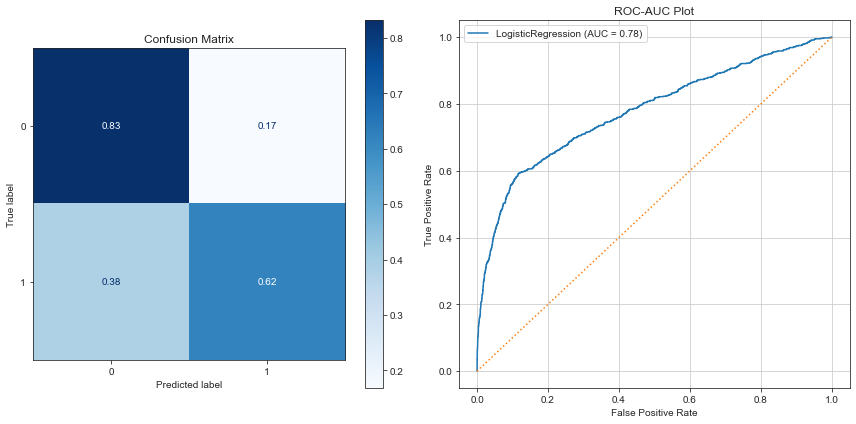

CPU times: user 2.71 s, sys: 32.9 ms, total: 2.75 s
Wall time: 429 ms


In [39]:
%%time 
# Observe time lapse
logreg_clf = LogisticRegression(class_weight = 'balanced')
logreg_clf.fit(X_train, y_train) # fit model
logreg_prediction = logreg_clf.predict(X_test)
lrs = round(accuracy_score(logreg_prediction, y_test)*100,2)
print('Accuracy Percentage', lrs, '\n')
print(classification_report(y_test, logreg_prediction), '\n\n')

model_visuals (logreg_clf, X_test, y_test) # class report / plots

## Random Forest

Accuracy Percentage 89.56 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6771
           1       0.51      0.27      0.35       796

    accuracy                           0.90      7567
   macro avg       0.71      0.62      0.65      7567
weighted avg       0.88      0.90      0.88      7567
 




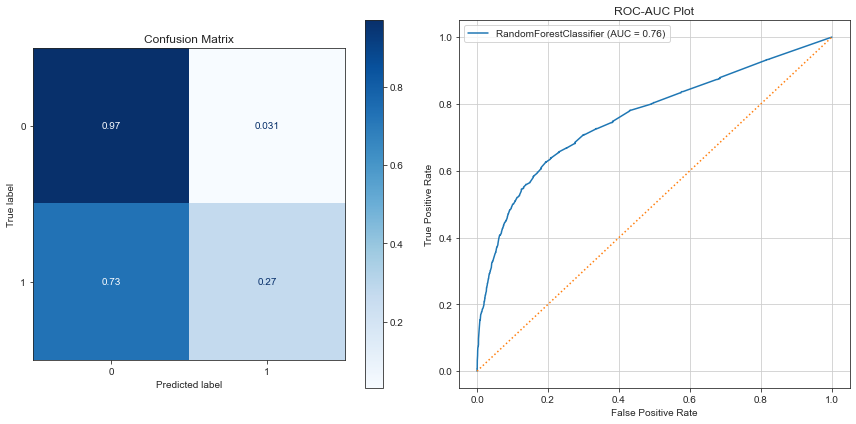

CPU times: user 2.38 s, sys: 31.9 ms, total: 2.42 s
Wall time: 2.42 s


In [40]:
%%time 

ranfor_clf = RandomForestClassifier(class_weight = 'balanced') # random forest 
ranfor_clf.fit(X_train, y_train) # fit model
ranfor_prediction = ranfor_clf.predict(X_test)
random_forest_score = round(accuracy_score(ranfor_prediction, y_test)*100,2)
print('Accuracy Percentage', random_forest_score, '\n')
print(classification_report(y_test, ranfor_prediction), '\n\n')

model_visuals (ranfor_clf, X_test, y_test) # class report / plots

## Support Vector Machine

Accuracy Percentage 83.64 

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6771
           1       0.34      0.60      0.44       796

    accuracy                           0.84      7567
   macro avg       0.65      0.73      0.67      7567
weighted avg       0.88      0.84      0.86      7567
 




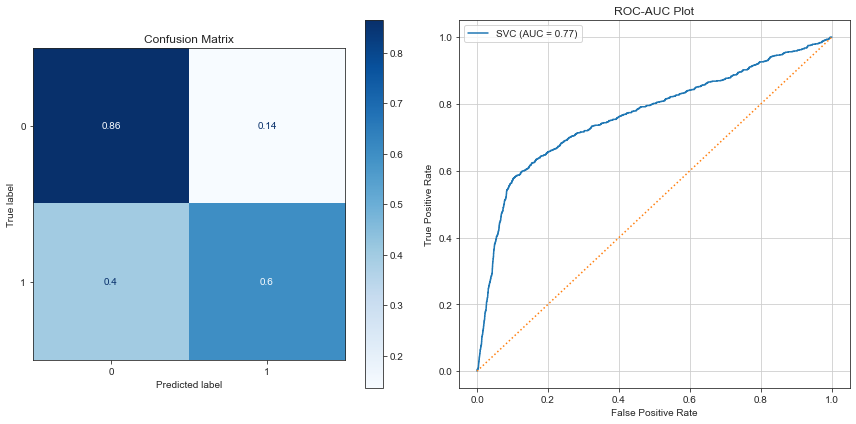

CPU times: user 1min 17s, sys: 415 ms, total: 1min 17s
Wall time: 1min 16s


In [41]:
%%time 

svm_clf = SVC(class_weight = 'balanced')
svm_clf.fit(X_train, y_train) # fit model
svm_prediction = svm_clf.predict(X_test)
svm_score = round(accuracy_score(svm_prediction, y_test)*100,2)
print('Accuracy Percentage', svm_score, '\n')
print(classification_report(y_test, svm_prediction), '\n\n')

model_visuals (svm_clf, X_test, y_test) # class report / plots

## K-Nearest Neighbors

Accuracy Percentage 89.81 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6771
           1       0.53      0.25      0.34       796

    accuracy                           0.90      7567
   macro avg       0.73      0.61      0.64      7567
weighted avg       0.88      0.90      0.88      7567
 




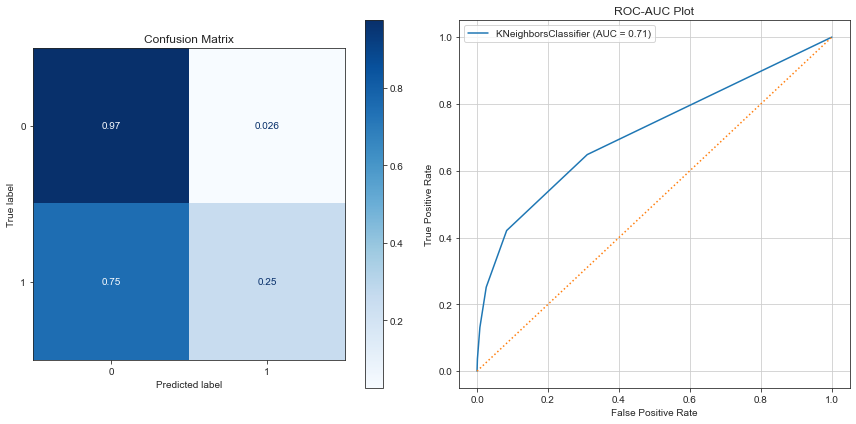

CPU times: user 30.8 s, sys: 47.8 ms, total: 30.8 s
Wall time: 29.7 s


In [42]:
%%time 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train) # fit model
knn_prediction = knn_clf.predict(X_test)
knn_score = round(accuracy_score(knn_prediction, y_test)*100,2)
print('Accuracy Percentage', knn_score, '\n')
print(classification_report(y_test, knn_prediction), '\n\n')

model_visuals (knn_clf, X_test, y_test) # class report / plots

## Guassian Naive Bayes

Accuracy Percentage 69.17 

              precision    recall  f1-score   support

           0       0.95      0.69      0.80      6771
           1       0.21      0.70      0.32       796

    accuracy                           0.69      7567
   macro avg       0.58      0.70      0.56      7567
weighted avg       0.87      0.69      0.75      7567
 




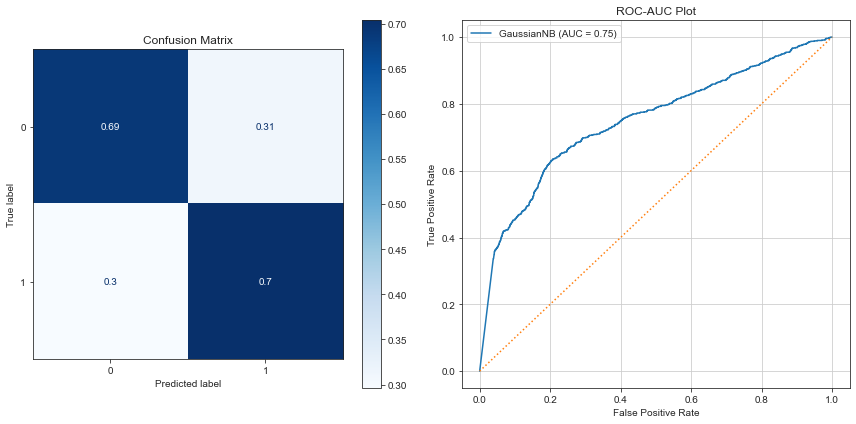

CPU times: user 1.86 s, sys: 51.9 ms, total: 1.91 s
Wall time: 394 ms


In [43]:
%%time 

gaussian_clf = GaussianNB() # guassian naive bayes
gaussian_clf.fit(X_train, y_train) # fit model
gaussian_prediction = gaussian_clf.predict(X_test)
gaussian_score = round(accuracy_score(gaussian_prediction, y_test)*100,2)
print('Accuracy Percentage', gaussian_score, '\n')
print(classification_report(y_test, gaussian_prediction), '\n\n')
model_visuals (gaussian_clf, X_test, y_test) # class report / plots

## Decision Tree

Accuracy Percentage 84.1 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6771
           1       0.28      0.32      0.30       796

    accuracy                           0.84      7567
   macro avg       0.60      0.61      0.60      7567
weighted avg       0.85      0.84      0.85      7567
 




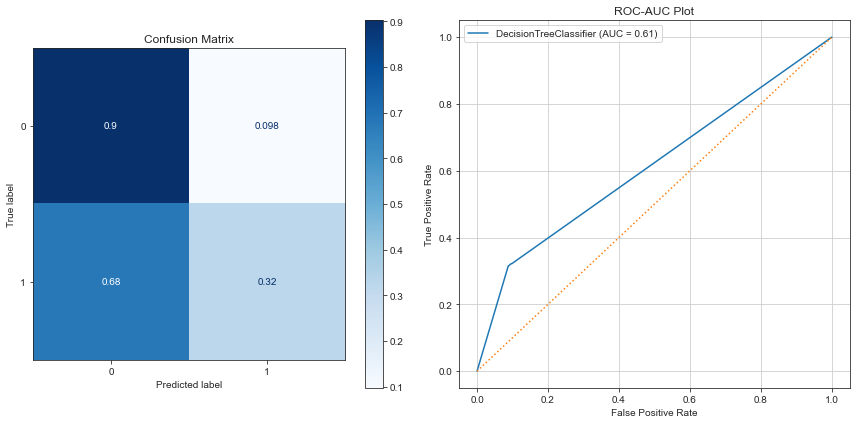

CPU times: user 441 ms, sys: 13.3 ms, total: 454 ms
Wall time: 452 ms


In [44]:
%%time 

dectree_clf = DecisionTreeClassifier(class_weight = 'balanced') # Decision Tree 
dectree_clf.fit(X_train, y_train)  # fit model
dectree_prediction = dectree_clf.predict(X_test)
decision_tree_score = round(accuracy_score(dectree_prediction, y_test)*100,2)
print('Accuracy Percentage', decision_tree_score, '\n')
print(classification_report(y_test, dectree_prediction), '\n\n')
model_visuals (dectree_clf, X_test, y_test) # class report / plots

## Gradient Boosting

Accuracy Percentage 90.92 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6771
           1       0.68      0.26      0.38       796

    accuracy                           0.91      7567
   macro avg       0.80      0.62      0.66      7567
weighted avg       0.89      0.91      0.89      7567
 




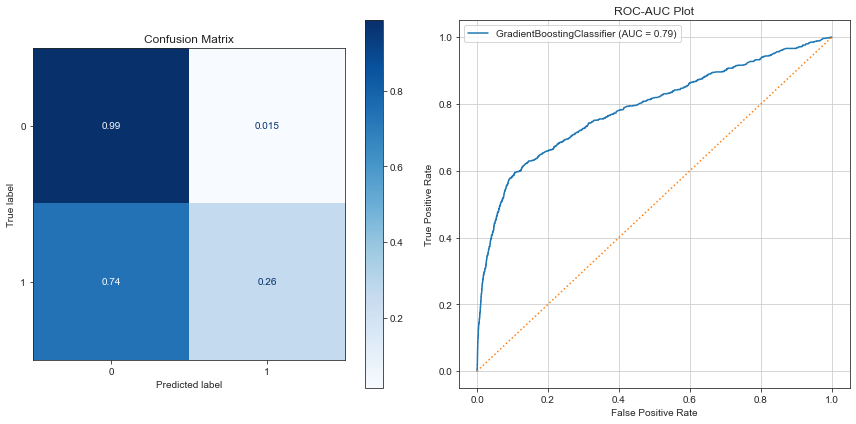

CPU times: user 3.14 s, sys: 18.6 ms, total: 3.16 s
Wall time: 2.58 s


In [45]:
%%time 

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train) # fit model
gb_prediction = gb_clf.predict(X_test)
gbclf_score = round(accuracy_score(gb_prediction, y_test)*100,2)
print('Accuracy Percentage', gbclf_score, '\n')
print(classification_report(y_test, gb_prediction), '\n\n')
model_visuals (gb_clf, X_test, y_test) # class report / plots

## Adaboost

Accuracy Percentage 90.7 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6771
           1       0.68      0.21      0.33       796

    accuracy                           0.91      7567
   macro avg       0.80      0.60      0.64      7567
weighted avg       0.89      0.91      0.88      7567
 




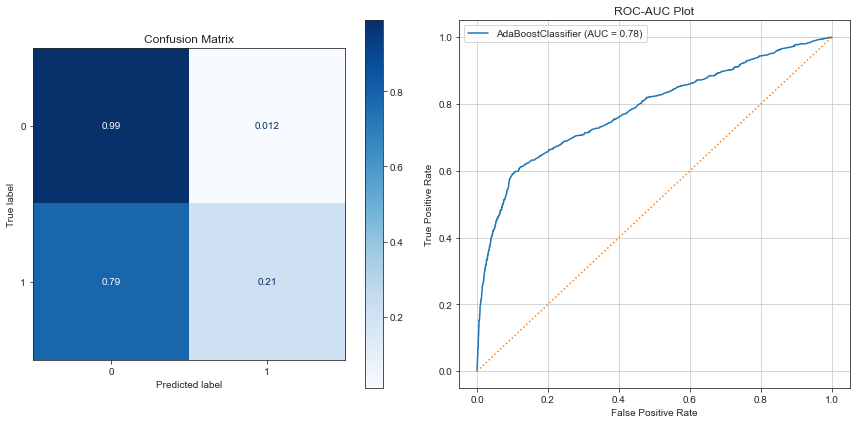

CPU times: user 3.51 s, sys: 270 ms, total: 3.78 s
Wall time: 1.4 s


In [46]:
%%time 

adabst_clf = AdaBoostClassifier()
adabst_clf.fit(X_train, y_train) # fit model
adabst_prediction = adabst_clf.predict(X_test)
adabst_score = round(accuracy_score(adabst_prediction, y_test)*100,2)
print('Accuracy Percentage', adabst_score, '\n')
print(classification_report(y_test, adabst_prediction), '\n\n')
model_visuals (adabst_clf, X_test, y_test) # class report / plots

# Interpret Models

In [47]:
# results dataframe
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'KNN', 
              'Random Forest', 
              'Gaussian Naive Bayes',
              'Support Vector Machine (SVC)', 
              'Decision Tree', 
              'AdaBoostClassifier', 
              'GradientBoostingClassifier',
             ],
    'Score': [lrs, 
              knn_score, 
              random_forest_score, 
              gaussian_score,
              svm_score, 
              decision_tree_score,
              adabst_score, 
              gbclf_score, 
             ]})

models.sort_values(by='Score', ascending=False) #sorting by score

,Model,Score
7,GradientBoostingClassifier,90.92
6,AdaBoostClassifier,90.70
1,KNN,89.81
2,Random Forest,89.56
5,Decision Tree,84.10
4,Support Vector Machine (SVC),83.64
0,Logistic Regression,80.89
3,Gaussian Naive Bayes,69.17


<div class="alert alert-block alert-info">

It looks like Gradient Boosting Classifier is the most accurate with Ada Boost Classifier coming in at second place (close second). Guassian Naive Bayes is coming in at last place approximate 11 percentage points lower than the most accurate model. 


It is worth noting that the unbalanced target leads me to consider models based on the precision, recall and F1 score of the "1" variable (target "yes"). Fortunately, Gradient Boosting Classifier and Ada Boost Classifier performed well with precision scores of 0.68 and F1 scores over 0.33. 

</div>

## Gradient Boosting Classifier with GridSearchCV
Let's see if we can improve our results at all using GridSearch.

``` Python
# Grid Search Parameters
learn_rates = [0.05, 0.1]
max_depths = [2, 3]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

grid_search = GridSearchCV(GradientBoostingClassifier(), 
                           param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
```

```
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10]},
             return_train_score=True)

```

``` Python
print(grid_search.score(X_train, y_train))
print(grid_search.best_params_)
```

``` 
0.9074869490517412
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
```

<div class="alert alert-block alert-info">

Gridsearch CV did not raise the accuracy of the model. Let's see if we can improve the accuracy by addressing our class imbalance problem.

</div>

## Class Imbalance

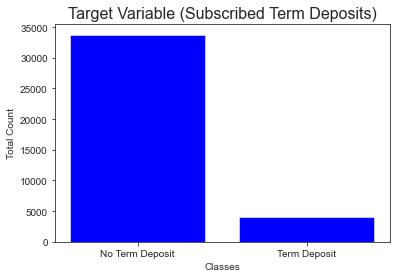

In [48]:
# Visualizing churn
plt.bar(['No Term Deposit', 'Term Deposit'], df.term_deposit_yes.value_counts().values, facecolor = 'blue',  linewidth=0.5)
plt.title('Target Variable (Subscribed Term Deposits)', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Total Count')
plt.show()

<div class="alert alert-success">

The graph above highlights that there is a a pretty high level of imbalance. We can remedy this using SMOTE.

</div>

## SMOTE (Synthetic Minority Over-sampling Technique)

In [49]:
# Separate target and features
y = df['term_deposit_yes']
X = df.drop(['term_deposit_yes'], axis=1) 

In [50]:
# Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [51]:
# Standardize the data
scaler = StandardScaler() # transform "X" features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from imblearn.over_sampling import SMOTE #import smote

In [53]:
smote = SMOTE(random_state=0) #random state 0 for consistency

In [54]:
%%time

X_res, y_res = smote.fit_resample(X_train, y_train) #fitting smote to our train sets

CPU times: user 817 ms, sys: 40.4 ms, total: 858 ms
Wall time: 432 ms


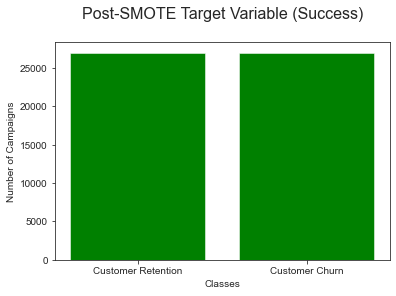

In [55]:
# Updated bar graph to display amount of failed vs. successful campaigns post-SMOTE
plt.bar(['Customer Retention', 'Customer Churn'], [sum(y_res), len(y_res)-sum(y_res)], facecolor = 'green',  linewidth=0.5)
plt.title('Post-SMOTE Target Variable (Success)\n', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Number of Campaigns')
plt.show()

<div class="alert alert-success">

It looks like our classes are balanced now. Let's proceed.

</div>

In [56]:
%%time

# Top 2 + 2 to save time
adabst_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()
ranfor_clf = RandomForestClassifier()
dectree_clf = DecisionTreeClassifier()

classifiers = [adabst_clf, gb_clf, ranfor_clf, dectree_clf] # Classifiers
classifiers_names = ['AdaBoost', 'Gradient Boost', 'Random Forest', 'Decision Tree'] # respective names

CPU times: user 6.79 ms, sys: 616 µs, total: 7.41 ms
Wall time: 936 µs


In [57]:
%%time 

# iterating through classifiers and appending accuracy to list of scores
scores = []
for i in range(len(classifiers)):
    classifiers[i].fit(X_res, y_res)
    scores.append(round(classifiers[i].score(X_test, y_test), 3))

CPU times: user 27.3 s, sys: 170 ms, total: 27.5 s
Wall time: 15.6 s


In [58]:
# dataframe to compare results
dfsmote = pd.DataFrame({'Model': classifiers_names, 'Score': scores})

dfsmote.sort_values(by='Score', ascending=False) # sorting models by score

,Model,Score
1,Gradient Boost,0.890
2,Random Forest,0.888
0,AdaBoost,0.874
3,Decision Tree,0.842


<div class="alert alert-block alert-info">

The models performed worse than they did initially. SMOTE did not significantly impact model performance. 

</div>

# Feature Importance of Top Classifiers

Now that we know which classifiers have the most accuracy with our data, let's compare which features were the most important in the top two models: **Gradient Boosting Classifier and Adaboost.**

## Gradient Boosting Classifier

In [59]:
# Feature Importance
gb_model = gb_clf.fit(X_train, y_train)
gb_feature = pd.DataFrame({'Importance': gb_model.feature_importances_, 'Column': X.columns})
gb_feature = gb_feature.sort_values(by='Importance', ascending=False) 
print('Catboost Top 25 Features')
gb_feature[:25] # top 25 features

Catboost Top 25 Features


,Importance,Column
6,0.607760,nremployed
5,0.088632,consconfidx
2,0.082332,pdays
44,0.049236,poutcome_success
29,0.030109,contact_telephone
4,0.027007,conspriceidx
37,0.023283,month_oct
0,0.018831,age
1,0.010937,campaign
39,0.009582,day_of_week_mon


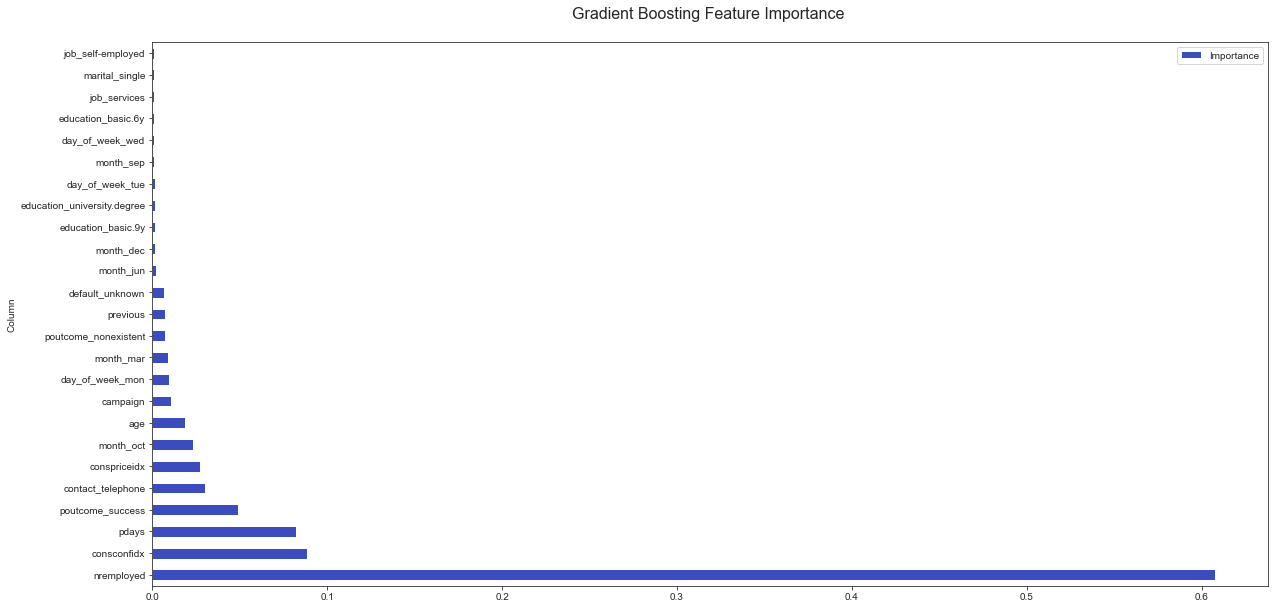

In [60]:
gb_feature = gb_feature[:25] # top 25 features
gb_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap = 'coolwarm')
plt.title('Gradient Boosting Feature Importance \n', fontsize=16)
plt.show()

## Adaboost Features

In [61]:
# Feature Importance
adabst_model = adabst_clf.fit(X_train, y_train)
ada_feature = pd.DataFrame({'Importance': adabst_model.feature_importances_, 'Column': X.columns})
ada_feature = ada_feature.sort_values(by='Importance', ascending=False) 
print('Adaboost Top 25 Features')
ada_feature[:25] 

Adaboost Top 25 Features


,Importance,Column
5,0.18,consconfidx
4,0.14,conspriceidx
37,0.10,month_oct
0,0.08,age
1,0.08,campaign
34,0.06,month_mar
2,0.04,pdays
6,0.04,nremployed
29,0.04,contact_telephone
43,0.02,poutcome_nonexistent


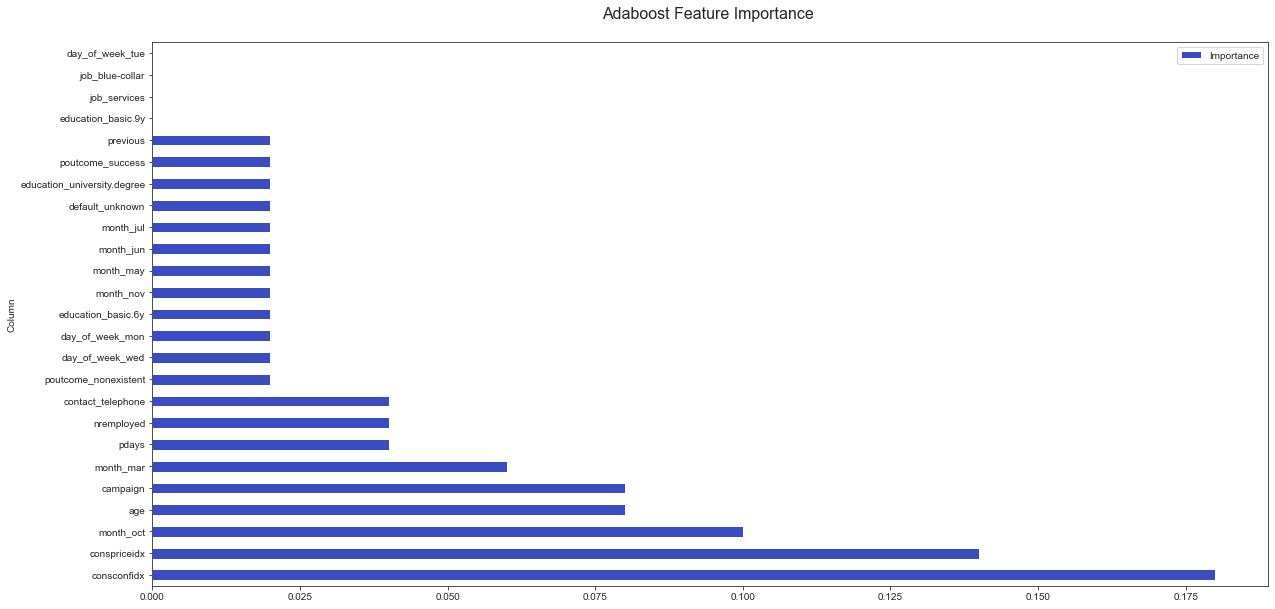

In [62]:
ada_feature = ada_feature[:25] # top 25 features
ada_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap = 'coolwarm')
plt.title('Adaboost Feature Importance \n', fontsize=16)
plt.show()

## Overlap

In [63]:
# Creating lists / top 25 features in each classifier 
gb = gb_feature.Column.unique() 
ada = ada_feature.Column.unique()

In [64]:
set(gb) & set(ada) # items appearing in both lists

{'age',
 'campaign',
 'consconfidx',
 'conspriceidx',
 'contact_telephone',
 'day_of_week_mon',
 'day_of_week_tue',
 'day_of_week_wed',
 'default_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_university.degree',
 'job_services',
 'month_jun',
 'month_mar',
 'month_oct',
 'nremployed',
 'pdays',
 'poutcome_nonexistent',
 'poutcome_success',
 'previous'}

<div class="alert alert-success">

There are 19 total items that appear in both classifier feature lists. 

Top rated features in both lists include:
* **Age**
* **Number of employees | quarterly indicator (nremployed)**
* **Campaign | (number of contacts / this campaign)**
* **Days since last campaign contact | Pdays**

</div>

## Visualizing Important Features

In [65]:
df_fresh['age_bin'] = df_fresh['age'].apply(lambda x: '[17, 25)' if x < 25 
                                else '[25, 30)' if x < 30 
                                else '[30, 35)' if x < 35
                                else '[35, 40)' if x < 40 
                                else '[40, 45)' if x < 45 
                                else '[45, 50)' if x < 50 
                                else '50+')

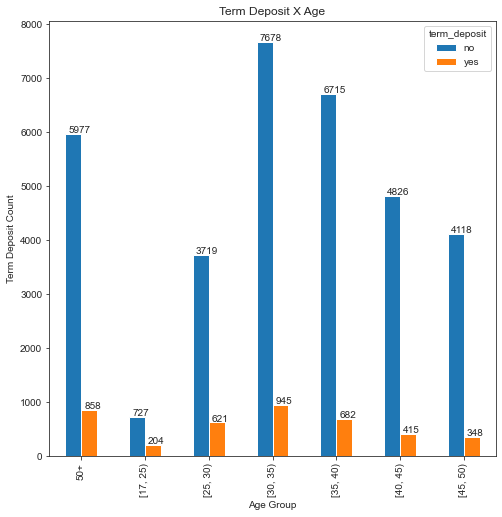

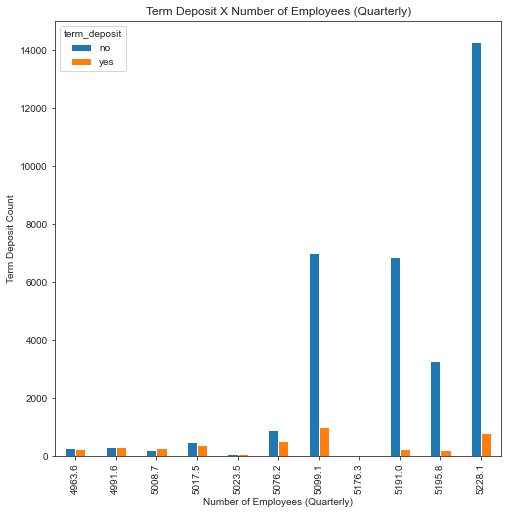

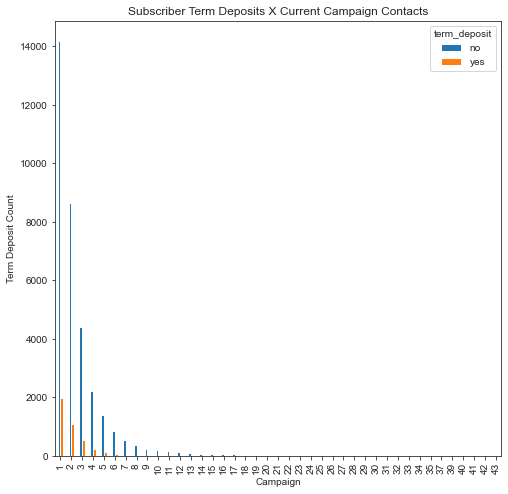

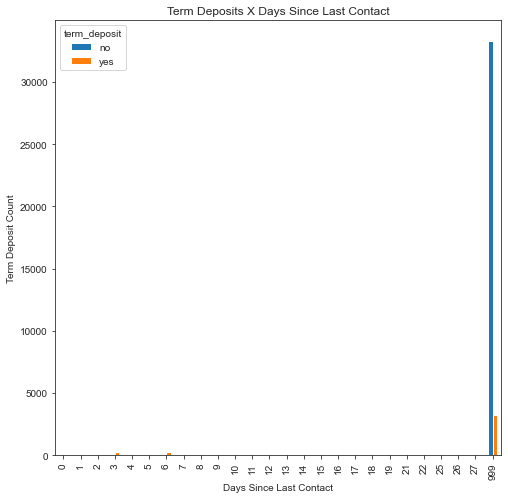

In [66]:
ax = df_fresh.groupby(['age_bin', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(8,8))
ax.set(xlabel='Age Group', ylabel='Term Deposit Count', title='Term Deposit X Age')
for a in ax.patches:
    ax.text(a.get_x()+0.05, a.get_height()+20,str(a.get_height()))
    
ax2 = df_fresh.groupby(['nr.employed', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(8,8))
ax2.set(xlabel='Number of Employees (Quarterly)', ylabel='Term Deposit Count', title='Term Deposit X Number of Employees (Quarterly)')
# for b in ax2.patches:
#     ax2.text(b.get_x()+0.05, b.get_height()+20,str(b.get_height()))

ax3 = df_fresh.groupby(['campaign', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(8,8))
ax3.set(xlabel='Campaign', ylabel='Term Deposit Count', title='Subscriber Term Deposits X Current Campaign Contacts')
# for c in ax3.patches:
#     ax3.text(c.get_x()+0.05, c.get_height()+20,str(c.get_height()))

ax4 = df_fresh.groupby(['pdays', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(8,8))
ax4.set(xlabel='Days Since Last Contact', ylabel='Term Deposit Count', title='Term Deposits X Days Since Last Contact')
# for d in ax4.patches:
#     ax4.text(d.get_x()+0.05, d.get_height()+20,str(d.get_height()))

plt.subplots_adjust(wspace=0.5)
plt.show()

# Conclusion, Insights, Limitations and Future Work

## Conclusion

The dataset offered various consumer trends and illustrated multiple areas of opportunity. In most cases, the features that related to these constants represented both; highest number of subscribers and highest number of non-subscribers. This leads us to believe that consistency and performance metrics are not followed as the volume of work increases resulting in a natural increase of total subscribers but an exponential increase in consumers who decline term deposit products. Selected customer and bank features will be evaluated in the business recommendations below. 

<div class="alert alert-block alert-info">

## Business Recommendations

1) Consumers between the ages of 30 and 40 make up the largest amount of term deposit subscribers but also reflect the largest amount of non-subscribing customers. The age group with the smallest gap between subscribing and non-subscribing customers includes customers ages 17 to 25. Construct and apply similarly structured marketing, outreach and advertising techniques to the customer age segment 30 to 40 in order to convert additional non-subscribing customers. 

2) The gap between number of subscribing and non-subscribing customers begins to grow significantly once the number of quarterly employed employees goes over 5076. While the number of subscribed term deposits does continue to grow the level of productivity declines dramatically. Review bank productivity guidelines and drive performance per employee when employee levels go over 5076. 

3) When considering the number of times a consumer has been contacted for the current campaign – there is an obvious decline in the number of subscriber term deposits as the number of contacts per customer increase. Deploy an A team (high performers) to handle customer outreach during the first three contacts to increase the chance of conversion. 

4) The 'days since last contact' data show an abundance of non-subscribing and subscribing consumers in the '999' or 'has not been contacted' category. Deploy a B team to (high performers) to field incoming marketing calls that arrive from numbers that are not registered in the bank's database. In addition, consider methods of dividing customers into 'new' and 'existing' during day-to-day operations.  High performing team members should be deployed to address new bank customers.  

</div> 

## Limitations

The dataset and business insights are limited to customers who specifically cite their job type, marital status and education level when registering as a bank customer. Additionally, the models and features reflect clients that are between 17 and 69 years of age. 

## Future Work
In order to more accurately define the boundaries of our features it is important to understand what customs and cultural influences are tied to this dataset (Portuguese banking info). For example: knowing the average level of education, the geographic locations of client residences and information on financial markets in this region may alter the way we perceive these variables.

Additionally, the dataset illustrates that the vast majority of subscribing consumers enroll in bank products when they are not contacted by telemarketers. It would be helpful to review additional data on these consumers in order to evaluate different means of product conversion (such as social media, the Internet, day-to-day walk-ins, etc.)